# IMU Feature Extraction Tutorial
This notebook goes over how to extract features from IMU data collected from the Consensys software as csvs.

It will cover:
1. Loading in and reading a csv file after data collection.
2. Functions/API to extract the features.
3. Retrieving the features.
4. Epoching the data.
5. Analyzing the features.



##### !! Important Note: This notebook does not cover how to choose which features could be important/relevant. Information of how the features were curated and how they could be useful, the report/document should be consulted !!

## 1. Now we load in the data into a dictionary
- The program will note down which fields it was able to find from the csv headings
- It will then make a full plot of the data for visualization purposes.
- This can be the first point where data analysis starts as alot of the happenings can be explained/related to kinematic/physical phenomena.
- It is best to always define the sampling frequency.
- The output will be a dictionary with the keys being the name of the 1D-Signal/Channel and the value being the time-series values in an array.

Note: the sample file shown can be downloaded from here: https://drive.google.com/file/d/12983jlE0_JX26EapCn6HbJSI-7CUnns6/view

In [1]:
#These are the imports
import feature_extractor
import numpy as np
import matplotlib.pyplot as plt


The following fields were found:

Timestamp_Unix : - Calibrated, units :ms
Accel_LN_X : - Calibrated, units :m/(s^2)
Accel_LN_Y : - Calibrated, units :m/(s^2)
Accel_LN_Z : - Calibrated, units :m/(s^2)
Gyro_X : - Calibrated, units :deg/s
Gyro_Y : - Calibrated, units :deg/s
Gyro_Z : - Calibrated, units :deg/s
Mag_X : - Calibrated, units :local_flux
Mag_Y : - Calibrated, units :local_flux
Mag_Z : - Calibrated, units :local_flux


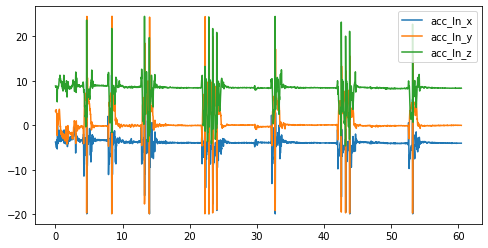

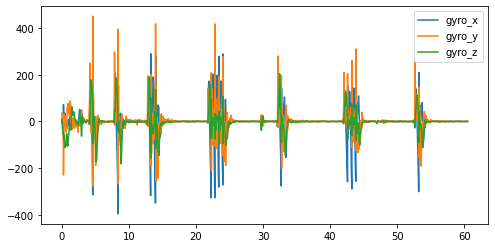

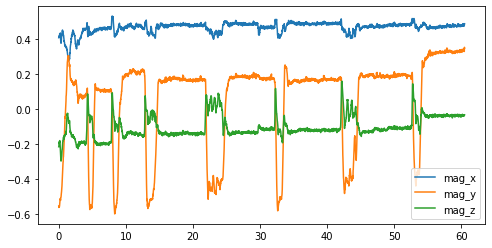

In [2]:
#First we name the file variable and the path to the directory
path_to_dir = './'
file_name = 'Clapping_Session1_Shimmer_C736_Calibrated_SD.csv'

#Then we load the csv file
#Most of the arguments have defaults, but if you do not like plotting/details, it can be turned off. Please define the correct sampling frequency.
sampling_freq = 50
imu_data = feature_extractor.get_imu_data(path=path_to_dir + file_name, 
                                        separation='\t', show_details=True, 
                                        fs=sampling_freq, plotting=True)


## 2. Now we extract
- The function to obtain statistical features will have multiple options as well.
- The functions we have only retrieve relevant statistical features.
- The input will need to have the dictionary of IMU-data obtained from the get_imu_data function.
- The output will also be a dictionary.

<br>
<br>


### 2.1 Sliding Window Stats Across The Whole Session
- This returns and plots (if option enabled) features displaying how they vary throughout the session full data collected.
- It will plot all the features and how they vary as the signal processes throughout the session.
- It will also list the features extracted which are the keys to the dictionary object that is output.


['Timestamp_Unix', 'Accel_LN_X', 'Accel_LN_Y', 'Accel_LN_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']

The features we get are :
Mean_LN_X
RMS_LN_X
STD_LN_X
Energy_LN_X
Kurtosis_LN_X
Skewness_LN_X
Peaks_LN_X
Valleys_LN_X
Mean_LN_Y
RMS_LN_Y
STD_LN_Y
Energy_LN_Y
Kurtosis_LN_Y
Skewness_LN_Y
Peaks_LN_Y
Valleys_LN_Y
Mean_LN_Z
RMS_LN_Z
STD_LN_Z
Energy_LN_Z
Kurtosis_LN_Z
Skewness_LN_Z
Peaks_LN_Z
Valleys_LN_Z
where LN stands for Low Noise Accelerometer and WR for Wide Range Accelerometer


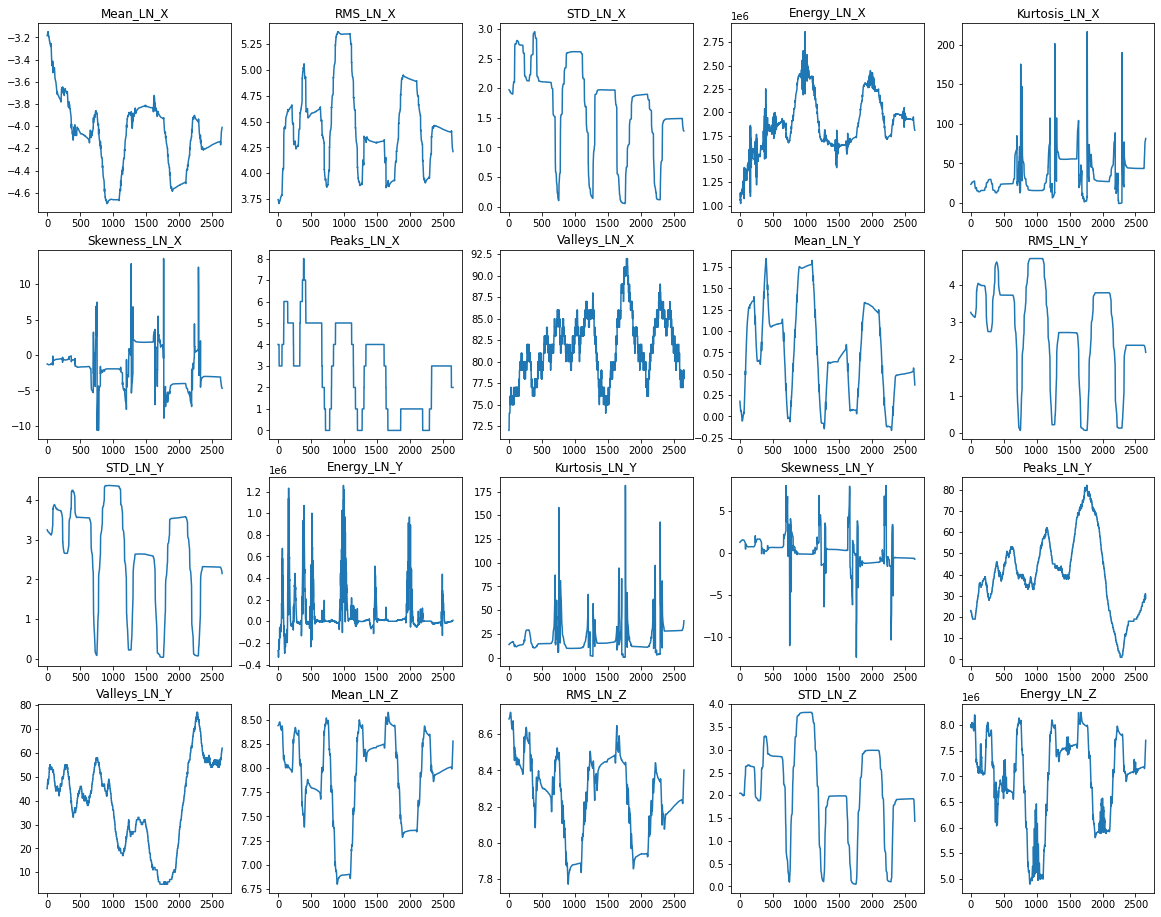

In [4]:
#Defining sampling frequency again for clarity
sampling_freq = 50

#Make sure to define the window size for the sliding window in seconds
window_size = 6.7

#Make Sure to set epochs = False for this use case

sliding_window_stats = feature_extractor.get_stat_features(imu_data=imu_data, 
                                            fs=sampling_freq, period = window_size, 
                                            plotting=True, epochs = False)


### 2.2 Epoching 
- If we want to see how the signal acts at certain defined windows (that we select), that provision is also available.
- For this we would need to epoch the session.
- The epochs would all be of a fixed length starting from a given onset.
- The onset times must be defined in array which shows when an event starts.

In [5]:
#Defining the onset times for clapping
clapping_onset = [6,8,13, 20, 32, 42,53]

#Defining the onset times for not clapping
stationary_onset = [10, 17, 25, 36]

#Defining epoch size in seconds
epoch_size = 2.0

#Defining sampling frequency of data
sampling_freq = 50

#There are no defaults for epoching, getting epochs for both clapping and no-clap
clapping_epochs = feature_extractor.get_epochs(imu_data=imu_data, 
                             onset_array=clapping_onset, 
                             period=epoch_size, fs=sampling_freq)
no_clapping_epochs = feature_extractor.get_epochs(imu_data=imu_data, 
                             onset_array=stationary_onset, 
                             period=epoch_size, fs=sampling_freq)


### 2.3 Getting features from the epochs
- Now we use the same function for the full session stats, except we now change the setting from epochs=False to epochs=True
- Make sure to input the epoched data as an input
- If there is only 1 stat returned, there is a good chance that the whole session was input rather than the epoched data

['Timestamp_Unix', 'Accel_LN_X', 'Accel_LN_Y', 'Accel_LN_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']

The features we get are :
Mean_LN_X
RMS_LN_X
STD_LN_X
Energy_LN_X
Kurtosis_LN_X
Skewness_LN_X
Peaks_LN_X
Valleys_LN_X
Mean_LN_Y
RMS_LN_Y
STD_LN_Y
Energy_LN_Y
Kurtosis_LN_Y
Skewness_LN_Y
Peaks_LN_Y
Valleys_LN_Y
Mean_LN_Z
RMS_LN_Z
STD_LN_Z
Energy_LN_Z
Kurtosis_LN_Z
Skewness_LN_Z
Peaks_LN_Z
Valleys_LN_Z
where LN stands for Low Noise Accelerometer and WR for Wide Range Accelerometer


/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/matplotlib/transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


['Timestamp_Unix', 'Accel_LN_X', 'Accel_LN_Y', 'Accel_LN_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']

The features we get are :
Mean_LN_X
RMS_LN_X
STD_LN_X
Energy_LN_X
Kurtosis_LN_X
Skewness_LN_X
Peaks_LN_X
Valleys_LN_X
Mean_LN_Y
RMS_LN_Y
STD_LN_Y
Energy_LN_Y
Kurtosis_LN_Y
Skewness_LN_Y
Peaks_LN_Y
Valleys_LN_Y
Mean_LN_Z
RMS_LN_Z
STD_LN_Z
Energy_LN_Z
Kurtosis_LN_Z
Skewness_LN_Z
Peaks_LN_Z
Valleys_LN_Z
where LN stands for Low Noise Accelerometer and WR for Wide Range Accelerometer


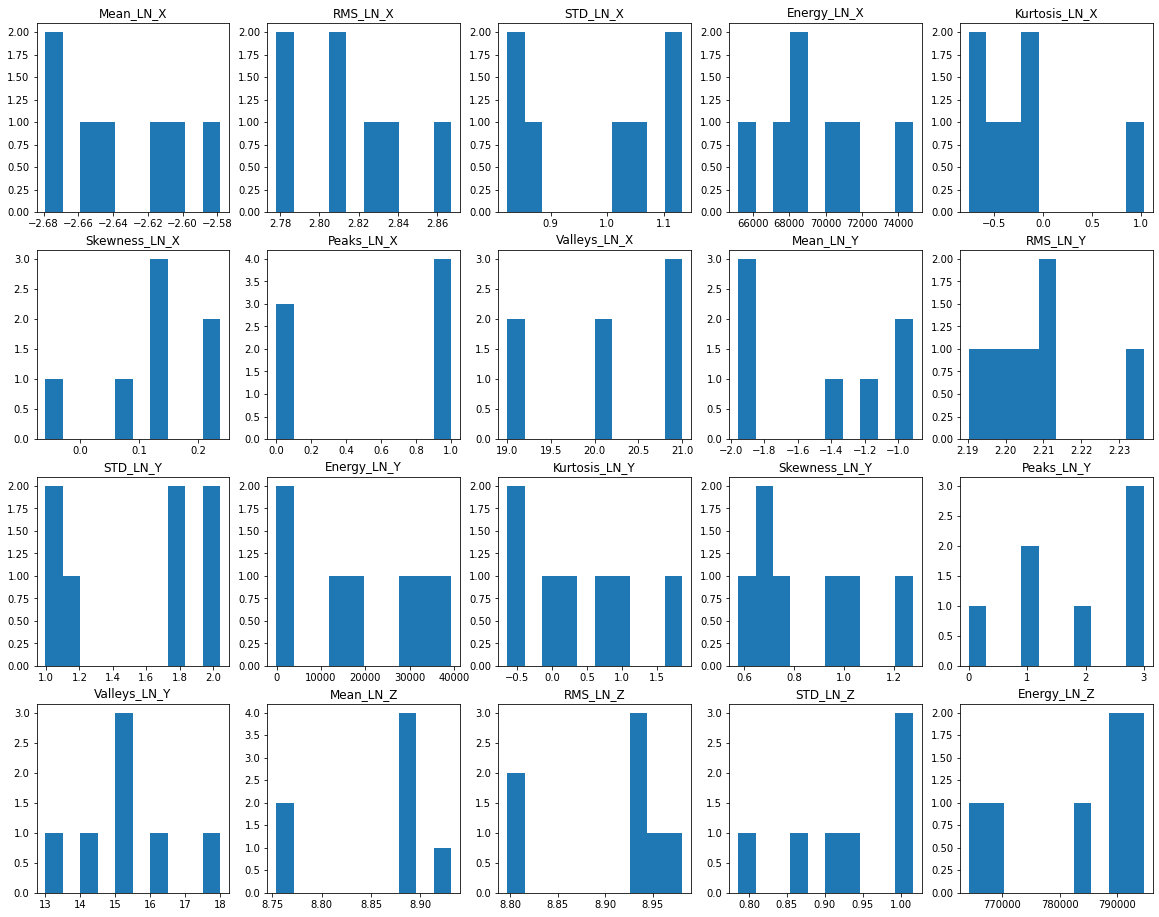

In [6]:
#Defining sampling frequency again for clarity
sampling_freq = 50

#Make sure to define the window size for the sliding window in seconds
window_size = 6.7

#Make Sure to set epochs = False for this use case
epoched_clapping_stats = feature_extractor.get_stat_features(imu_data=clapping_epochs,
                                                 fs=sampling_freq, plotting=True, 
                                                 epochs=True)

#Plotting only shows the histograms/bar-charts of the epoched data, so it might be better to set plotting to False
epoched_stationary_stats = feature_extractor.get_stat_features(imu_data=no_clapping_epochs, 
                                            fs=sampling_freq, plotting=False,
                                             epochs=True)

## 3. Plotting these statistics
- Having these automated quick plots is nice for a quick look, but to do more serious domain specific analysis, it might be better to get more hands on with the data.


### 3.1 First we plot the full session features
- The field itself can be gained based on the dictionary key values.
- We start off by defining a time vector for ease.
- For greater accuracy, you could pad the first N data points (based on window length) to be 0s.

Text(0.5, 1.0, 'Kurtosis Accelerometer X')

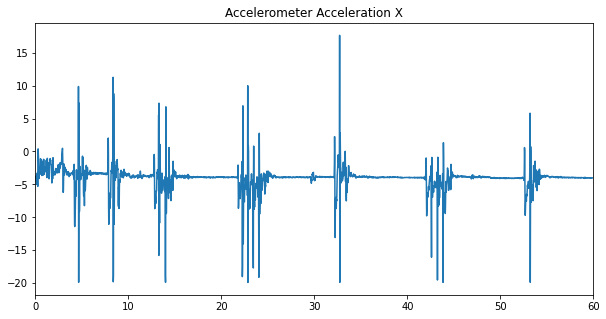

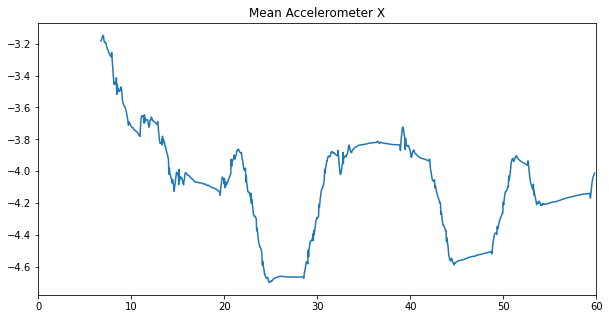

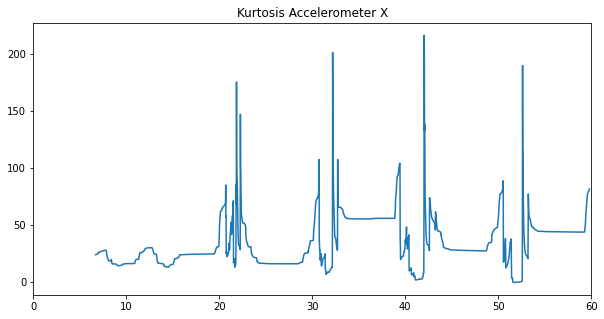

In [7]:
#Getting the specific feature we want from our extracted features
imu_acc_x = imu_data['Accel_LN_X']
mean_acc_x = sliding_window_stats['Mean_LN_X']
kurt_acc_x = sliding_window_stats['Kurtosis_LN_X']

#Defining the sampling frequency and time vector for signal and features
sampling_freq = 50
window_size = 6.7
t_signal = np.linspace(0.0, len(imu_acc_x)/sampling_freq, 
                len(imu_acc_x), endpoint=False)
t_stats = np.linspace(window_size, window_size+len(mean_acc_x)/sampling_freq, 
                len(mean_acc_x), endpoint=False)

#First we do a simple plot of the accelerometer acceleration x axis
plt.figure(figsize=(10,5))
plt.plot(t_signal, imu_acc_x)
plt.xlim(0,60)
plt.title("Accelerometer Acceleration X")

#Then we do a simple plot of the mean of the acceleration x axis sliding window
plt.figure(figsize=(10,5))
plt.plot(t_stats, mean_acc_x)
plt.xlim(0,60)
plt.title("Mean Accelerometer X")

#Then we try another simple plot of the kurtosis of the acceleration x axis sliding window
plt.figure(figsize=(10,5))
plt.plot(t_stats, kurt_acc_x)
plt.xlim(0,60)
plt.title("Kurtosis Accelerometer X")

### 3.2 Plotting epoched sessions for comparison
- Over here we try plotting epoched sessions and try making a direct comparison using boxplots using matplotlib.

['Mean_LN_X', 'RMS_LN_X', 'STD_LN_X', 'Energy_LN_X', 'Kurtosis_LN_X', 'Skewness_LN_X', 'Peaks_LN_X', 'Valleys_LN_X', 'Mean_LN_Y', 'RMS_LN_Y', 'STD_LN_Y', 'Energy_LN_Y', 'Kurtosis_LN_Y', 'Skewness_LN_Y', 'Peaks_LN_Y', 'Valleys_LN_Y', 'Mean_LN_Z', 'RMS_LN_Z', 'STD_LN_Z', 'Energy_LN_Z', 'Kurtosis_LN_Z', 'Skewness_LN_Z', 'Peaks_LN_Z', 'Valleys_LN_Z']


/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/saadhossain/miniconda3/envs/tensorflow-m1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Cast

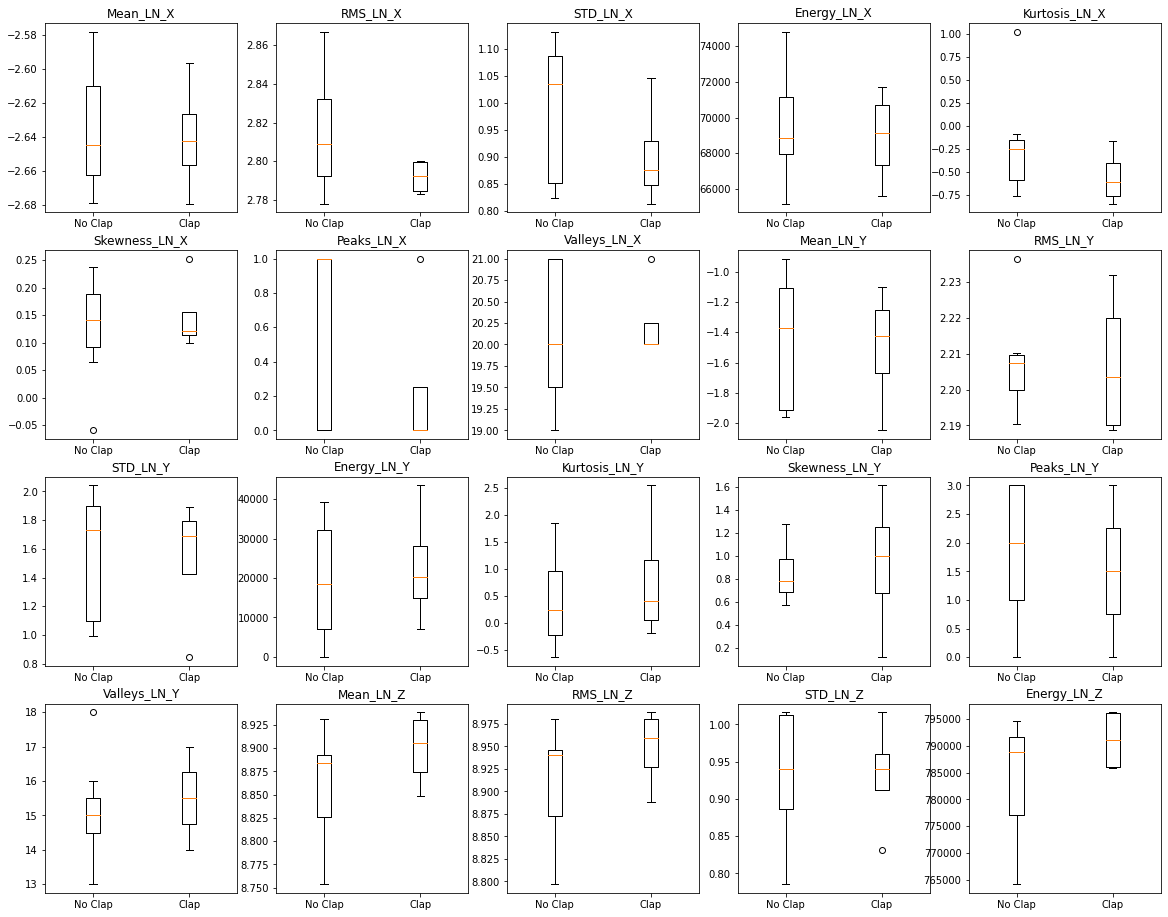

In [8]:
#First we get a list of the epoch features from the output we got earlier.
stat_names = list(epoched_clapping_stats.keys())
print(stat_names)
#
fig, axs = plt.subplots(len(stat_names)//5, 5, figsize=(20, 3.5*len(stat_names)//5))
index = 0
for i in range(len(stat_names)//5):
  for j in range(5):
      axs[i, j].boxplot([epoched_clapping_stats[stat_names[index]],
                         epoched_stationary_stats[stat_names[index]]])
      axs[i, j].set_xticklabels(["No Clap", "Clap"])
      axs[i, j].set_title(stat_names[index])
      index += 1